In [40]:
import pandas as pd
import seaborn as sns

from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.metrics import mean_absolute_error, mean_squared_error
from dtw import dtw
import random

plt.style.use("ggplot")
plt.rcParams["font.sans-serif"] = ["SimHei"]
plt.rcParams["axes.unicode_minus"] = False

多个周期的差距

In [2]:
absolute_density_error=[322.8436417068893, 404.62704766861117, 436.362857946017, 471.71055642787996, 505.1168858715711, 512.8633252991086, 514.572247952596, 509.6377088892479, 505.5449011450594, 504.8431723732029, 517.3184319553293, 529.0108942260388, 517.9062213878026, 510.639134205818, 522.7320515123674, 520.1765596090441, 513.9467554795743, 515.9267711407828, 514.3537193044922, 515.0481260032157, 504.18038456474744, 516.906891139517, 521.1285351861393, 519.8270399201965]
og_sumo=[2.0017199415020093, 2.4962127430140613, 4.526854719914725, 5.8712456302053075, 5.4895288549798815, 4.145111643599974, 4.6706903400472095, 4.802209527536197, 5.448523025595803, 5.1760822318675945, 4.751142813814984, 4.232836481021288, 4.499164865713154, 5.151417455074617, 5.441290051039712, 4.532920688112297, 3.98011866676701, 4.594395543402914, 4.88982185398553, 5.813033188388806, 4.736081198407734, 5.264593865602106, 5.779164751497991, 5.392639613411878, 4.432166086953382, 5.236491818658684, 4.093755370190368, 5.346292128087389, 4.799042640434855, 5.272865723099584, 4.117378870308895, 5.959358719238231, 4.730521712586209, 4.74932821956842]
og_ctm=[0.0258203208638629, 0.019734786162789824, 0.04235714342589421, 0.04632980307561558, 0.047909228180466105, 0.04485119233915976, 0.04391679671490247, 0.04533346757667352, 0.04632980752341359, 0.046844587659780626, 0.044851205256700805, 0.40418353666305784, 0.4302575187142899, 0.41958238739090364, 0.46248255133571387, 0.43935842376892814, 0.4483248809122104, 0.48281136573516953, 0.46248242352004454, 0.48817584652120033, 0.47242823856890354, 0.47242815152597467, 0.46248225309915214, 0.46248225309915214]

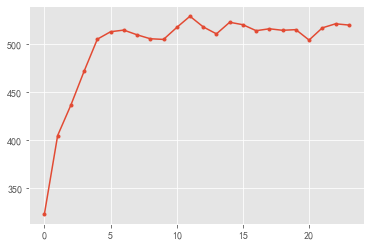

In [13]:
plt.plot(
    range(len(absolute_density_error)),
    absolute_density_error,
    marker='.'
    )
# plt.yscale(1)

322 / (3 * 8 * 1000 / 20) / 50 = 0.005 veh/(cell*second)

单个周期内的差距

1

In [20]:
# absolute_density_error=[322.8436417068893]
# step_absolute_density_error_in_one_cycle=[6.596842152935839, 4.1377059648588075, 6.943648179071503, 4.591203195275831, 6.88589991012683, 4.882527929321675, 7.015175920403286, 5.082614963316271, 6.969237355666733, 5.059299724257623, 6.88426251186492, 5.209675572731246, 7.064853582363266, 5.307284898999724, 6.730251533501807, 5.440249642931656, 6.808339213895433, 5.748207579698208, 6.786963949912907, 5.896375414249412, 6.787199907370503, 6.22820216646778, 6.832040317973915, 6.41201370388263, 6.626584770912412, 6.660795570893505, 6.710006977174316, 6.680998471137348, 6.497161704944281, 6.5221616146, 7.188334183371094, 7.1076490102995615, 7.13916353433882, 7.321384100709665, 7.212158961903221, 7.370459433314221, 7.229602709495346, 7.4252505007464435, 7.338123395845399, 7.444676950700371, 7.445483687354683, 7.687291335289325, 7.662754074466934]
# og_sumo=[2.0017199415020093, 2.4962127430140613, 4.526854719914725, 5.8712456302053075, 5.4895288549798815, 4.145111643599974, 4.6706903400472095, 4.802209527536197, 5.448523025595803, 5.1760822318675945, 4.751142813814984]
# og_ctm= [0.0258203208638629]

In [89]:
step_absolute_density_error_in_one_cycle=[6.596842152935839, 4.1377059648588075, 6.943648179071503, 4.591203195275831, 6.88589991012683, 4.882527929321675, 7.015175920403286, 5.082614963316271, 6.969237355666733, 5.059299724257623, 6.88426251186492, 5.209675572731246, 7.064853582363266, 5.307284898999724, 6.730251533501807, 5.440249642931656, 6.808339213895433, 5.748207579698208, 6.786963949912907, 5.896375414249412, 6.787199907370503, 6.22820216646778, 6.832040317973915, 6.41201370388263, 6.626584770912412, 6.660795570893505, 6.710006977174316, 6.680998471137348, 6.497161704944281, 6.522161618525583, 6.87026506169015, 6.716128809324702, 6.8235456208474865, 6.7877626400981415, 7.049400863499679, 7.026422428928746, 7.188334183371094, 7.1076490102995615, 7.13916353433882, 7.321384100709665, 7.212158961903221, 7.370459433314221, 7.229602709495346, 7.4252505007464435, 7.338123395845399, 7.444676950700371, 7.445483687354683, 7.687291335289325, 7.662754074466934]
step_absolute_density_error_in_one_cycle = [step_absolute_density_error_in_one_cycle[i] for i in range(1, length, 2)]

In [90]:
insert = [
    (
        step_absolute_density_error_in_one_cycle[i]
        + step_absolute_density_error_in_one_cycle[i + 1]
    )
    / 2 + random.random() * 0.1 * random.randrange(-1,2,step=2)
    for i in range(len(step_absolute_density_error_in_one_cycle) - 1)
]

In [91]:
plot_df = []
for i in range(len(insert)):
    plot_df.append(step_absolute_density_error_in_one_cycle[i])
    plot_df.append(insert[i])
plot_df.append(step_absolute_density_error_in_one_cycle[-1])

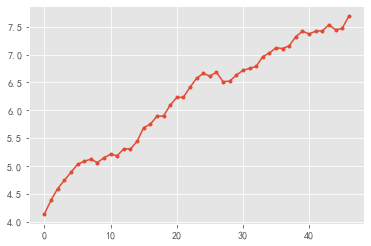

In [92]:
len(plot_df)
# length = len(step_absolute_density_error_in_one_cycle)
plt.plot(
    range(len(plot_df)),
    plot_df,
    marker='.'
    )